# Ejercicio

### Preparación de los datos del enunciado. Esta información no se proporciona al estudiante en el enunciado del ejercicio.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
pmule_path = r'/content/gdrive/MyDrive/COMPARTIDOS/COMPARTIDO_AREA/DOCENCIA/Direccion_de_Proyectos/pmule/compartido_publico_alumnos/'

import sys
sys.path.insert(1, pmule_path + "src")
!source {pmule_path}venv/bin/activate
!apt install libgraphviz-dev
!python -m pip install pygraphviz "pandas[excel]"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# bmatrix esta sacada de: https://stackoverflow.com/questions/17129290/numpy-2d-and-1d-array-to-latex-bmatrix
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    a = a.values
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

from pmule import *
# Alargamos el ancho de las celdas a un tanto por ciento
from IPython.display import display, HTML, Markdown, Math, Latex
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import numpy as np
import sympy as sym

proyecto = ProjectGraph.from_dict_of_strings({
    "A": "---",
    "B": "---",
    "C": "B",
    "D": "---",
    "E": "A,B",
    "F": "C",
    "G": "C",
    "H": "D,E",
    "I": "E,F",
    "J": "G,H",
    "K": "H,I",
    "L": "I",
    "M": "J",
    "N": "K",
})


In [ ]:
rutas = pd.Series({key: ', '.join(value) for key, value in proyecto.paths(dummies=False).items()}).to_frame().rename({0:'Activities'}, axis=1)

# Ejercicio:
A partir de los datos de las posibles rutas entre el nodo inicial y final del proyecto, y de los datos de duraciones y costes siguientes:

In [ ]:
rutas

,Activities
Route_1,"D, H, J, M"
Route_2,"D, H, K, N"
Route_3,"B, C, F, I, L"
Route_4,"B, C, F, I, K, N"
Route_5,"B, C, G, J, M"
Route_6,"B, E, H, J, M"
Route_7,"B, E, H, K, N"
Route_8,"B, E, I, L"
Route_9,"B, E, I, K, N"
Route_10,"A, E, H, J, M"


Se pide:
1. Determinar la matriz de caminos del proyecto

2. Utilizar la matriz de caminos del proyecto para calcular su duración

3. Calcular utilizando el método de Zaderenko los tiempos tempranos y tardíos

4. Tabla de prelaciones distantes

Realizar los cálculos utilizando números enteros con redondeo siempre hacia infinito positivo.


## 1 Determinar la matriz de caminos del proyecto

In [ ]:
proyecto.display_path_matrix(dummies=False)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
Route_1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
Route_2,0,0,0,1,0,0,0,1,0,0,1,0,0,1
Route_3,0,1,1,0,0,1,0,0,1,0,0,1,0,0
Route_4,0,1,1,0,0,1,0,0,1,0,1,0,0,1
Route_5,0,1,1,0,0,0,1,0,0,1,0,0,1,0
Route_6,0,1,0,0,1,0,0,1,0,1,0,0,1,0
Route_7,0,1,0,0,1,0,0,1,0,0,1,0,0,1
Route_8,0,1,0,0,1,0,0,0,1,0,0,1,0,0
Route_9,0,1,0,0,1,0,0,0,1,0,1,0,0,1
Route_10,1,0,0,0,1,0,0,1,0,1,0,0,1,0


## 2. Utilizar la matriz de caminos del proyecto para calcular su duración

In [ ]:
duraciones = {
 'A': 4,
 'B': 6,
 'C': 9,
 'D': 6,
 'E': 11,
 'F': 4,
 'G': 15,
 'H': 24,
 'I': 6,
 'J': 13,
 'K': 6,
 'L': 11,
 'M': 13,
 'N': 6}

In [ ]:
D = pd.Series(duraciones).to_frame()
path_matrix = proyecto.path_matrix(dummies=False)
duraciones_caminos = path_matrix @ D

In [ ]:
# LaTex for pretty print, the calculations are already done
Math(  bmatrix(path_matrix) + " \\times " + bmatrix(D)   + " = " + bmatrix(duraciones_caminos))

<IPython.core.display.Math object>

In [ ]:
duraciones_caminos

,0
Route_1,56
Route_2,42
Route_3,36
Route_4,37
Route_5,56
Route_6,67
Route_7,53
Route_8,34
Route_9,35
Route_10,65


In [ ]:
duraciones_caminos.values.max()

67

## Calcular utilizando el método de Zaderenko los tiempos tempranos y tardíos

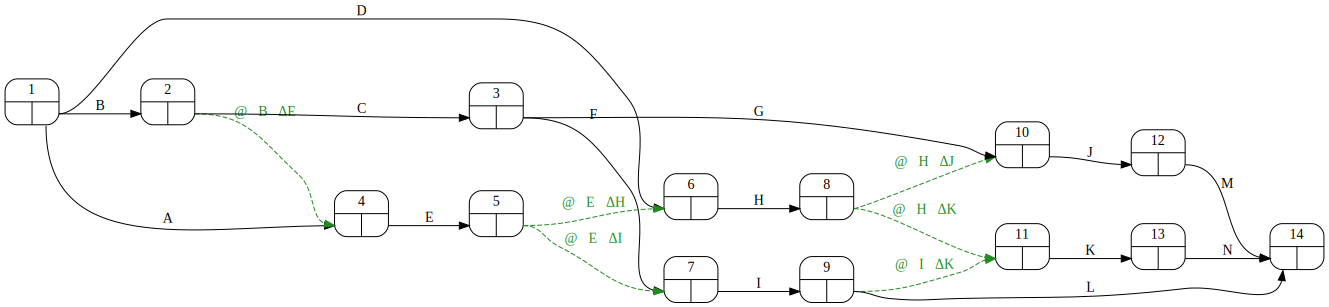

In [ ]:
proyecto.pert(durations=False, ranksep=1)

In [ ]:
proyecto.zaderenko(duraciones)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,early
1,,6.0,,4.0,,6.0,,,,,,,,,0.0
2,,,9.0,0.0,,,,,,,,,,,6.0
3,,,,,,,4.0,,,15.0,,,,,15.0
4,,,,,11.0,,,,,,,,,,6.0
5,,,,,,0.0,0.0,,,,,,,,17.0
6,,,,,,,,24.0,,,,,,,17.0
7,,,,,,,,,6.0,,,,,,19.0
8,,,,,,,,,,0.0,0.0,,,,41.0
9,,,,,,,,,,,0.0,,,11.0,25.0
10,,,,,,,,,,,,13.0,,,41.0


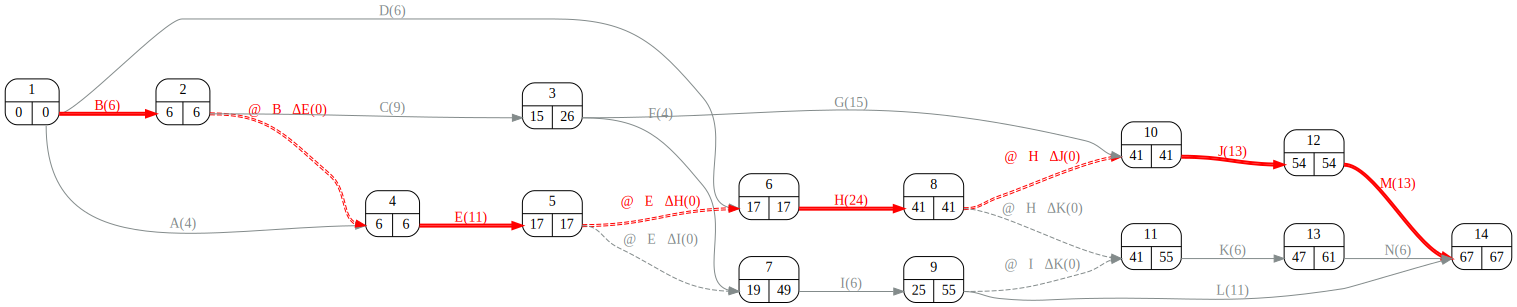

In [ ]:
proyecto.pert(durations=duraciones, ranksep=1)

## 4. Tabla de prelaciones distantes

In [ ]:
pd.Series({key: ', '.join(sorted(list(value))) for key, value in proyecto.distant_predecessor().items()}).to_frame().rename({0:'Preceding Activities'}, axis=1)

,Preceding Activities
A,
B,
C,B
D,
E,"A, B"
F,"B, C"
G,"B, C"
H,"A, B, D, E"
I,"A, B, C, E, F"
J,"A, B, C, D, E, G, H"
